In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unicodedata
from risk_analytics_tools.RiskModel import RiskModel
from analytics_tools.analytics_tools3 import treat_missing,freq_discrete,normalize_discrete,recode_discrete,remove_unary
pd.set_option('display.max_columns',500)
%matplotlib inline

In [112]:
def clean_text(text):
    try:
        res = text.decode('utf-8')
    except:    
        res = text
    res =  unicodedata.normalize('NFD', res).encode('ascii', 'ignore').lower()
    res = re.sub("[^a-zA-Z0-9 ]","", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [113]:
df = pd.read_excel('Completo.xlsx',encoding='utf8')

In [114]:
df.shape

(223, 80)

In [115]:
vard = [u'Género',u'Estado civil',u'¿Tienes hijos?',u'¿Tienes alguna dificultad para? [👓 Ver]',
       u'¿Tienes alguna dificultad para? [👂 Escuchar]',
       u'¿Tienes alguna dificultad para? [💪 Realizar alguna actividad física]',
        u'¿Dónde vives actualmente?',u'¿En qué delegación o municipio?',
        u'¿Qué medio de transporte utilizas para llegar a la facultad?',
        u'¿Cuál de las siguientes opciones describe tu tipo de vivienda?',
        u'¿Cuál es el máximo nivel de estudios de tu papá?',
       u'¿Cuál es el máximo nivel de estudios de tu mamá?',
        u'En caso de que tengas smartphone ¿Qué sistema operativo tiene?',
       u'¿Dónde vivirás mientras cursas tus estudios universitarios?',
       u'¿De qué forma financiarás tus estudios universitarios?',
       u'¿Trabajas actualmente?',
        u'Selecciona, según sea el caso, el tipo de institución en la que cursaste los niveles básicos de estudio [Primaria]',
       u'Selecciona, según sea el caso, el tipo de institución en la que cursaste los niveles básicos de estudio [Secundaria]',
       u'¿En dónde cursaste el bachillerato?',
        u'¿Recibiste alguna beca?',
       u'Simultaneo a tus estudios de bachillerato ¿tuviste que trabajar?',
       u'Señala tu nivel de conocimiento de idiomas [Inglés]',
       u'Señala tu nivel de conocimiento de idiomas [Otro idioma]',
       u'Señala tu nivel de conocimiento de idiomas [Lengua indígena]',
       u'¿Tienes algún certificado que corrobore tu nivel de inglés?',
       u'¿Tienes estudios incompletos de una carrera profesional o técnica superior?',
       u'¿Qué nivel de conocimientos posees de...? [Procesadores de texto (Word, TeX, etc.)]',
       u'¿Qué nivel de conocimientos posees de...? [Hojas de cálculo (Excel, Calc, etc.)]',
       u'¿Qué nivel de conocimientos posees de...? [Programación]',
       u'¿Qué nivel de conocimientos posees de...? [Gestor de base de datos (SQL)]',
       u'¿Cuál fue el proceso de admisión por el que entraste a esta carrera?',
       u'Escoger ésta carrera fue...', u'Al escoger la FES Acatlán ésta fue:',
       u'¿Cuándo tomaste la decisión de lo que querías estudiar?',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Recomendación de conocidos]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Mucha oferta laboral para esta carrera]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Promoción y prestigio social]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Es una carrera fácil]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Es una carrera corta]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [No me admitieron en otra carrera]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Me obligaron mis papás]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Me la recomendaron conocidos y amigos]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Autorealización]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Va de acuerdo a mis aptitudes e intereses]',
       u'¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Por el estatus económico que adquiriré al titularme]',
       u'¿Qué tanto sabes sobre...? [El perfil de estudios de la carrera]',
       u'¿Qué tanto sabes sobre...? [El plan de estudios]',
       u'¿Qué tanto sabes sobre...? [El nivel de exigencia]',
       u'¿Qué tanto sabes sobre...? [La empleabilidad de los egresados]',
       u'¿Qué tanto sabes sobre...? [Los maestros de la carrera]',
       u'¿Qué tanto sabes sobre...? [El cuerpo directivo de la carrera y la universidad]',
       u'¿Qué tanto sabes sobre...? [Actividades deportivas y culturales que ofrece la facultad]',
       u'¿Qué tanto sabes sobre...? [Recursos de apoyo ]',
        u'Al terminar la carrera ¿qué esperas hacer además de titularte?'  
       ]
varc = [u'Edad 🎂',
        u'¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱',
        u'¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti',
       u'¿Cuántos son hombres?', u'¿Cuántas son mujeres?',
       u'¿Cuánto tiempo llevas viviendo ahí? (años)',
       u'¿Cuántos cuartos para dormir tiene tu vivienda?',
        u'¿Cuántos automóviles en total tienen las personas que conforman tu hogar?',
        u'¿Qué promedio obtuviste en el bachillerato?',
       u'¿En cuántos años lo terminaste?',
        u'¿A cuánto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?',
        u'¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Deportes ⚽️🏀🏈]',
       u'¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades culturales 🎭🎬🎻]',
       u'¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades sociales (fiestas, reuniones con amigos, familia, etc.)]',
       u'¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Entretenimiento personal (videojuegos, redes sociales, netflix, youtube, etc)]']

In [116]:
varc2=['c_%d'%i for i in range(len(varc))]
vard2=['d_%d'%i for i in range(len(vard))]

In [117]:
df.rename(columns=dict(zip(varc,varc2)),inplace=True)
df.rename(columns=dict(zip(vard,vard2)),inplace=True)

In [118]:
df = df[[v for v in df.columns if (v[:2] in ['c_','d_'] or (v==u'Carrera'))]]

In [119]:
df.head()

Carrera     d_0  c_0                d_1 d_2  \
0  Matemáticas Aplicadas y Computación  Hombre   18          👤 Soltero  No   
1  Matemáticas Aplicadas y Computación   Mujer   18           💍 Casado  Sí   
2  Matemáticas Aplicadas y Computación  Hombre   18          👤 Soltero  No   
3  Matemáticas Aplicadas y Computación  Hombre   42          👤 Soltero  No   
4  Matemáticas Aplicadas y Computación  Hombre   18  👥 En una relación  No   

  d_3 d_4 d_5               d_6                   d_7    c_1  \
0  Si  No  No              CDMX    Gustavo A. Madero   120.0   
1  Si  No  No  Estado de México             Naucalpan   60.0   
2  No  No  No  Estado de México     Los reyes la paz   130.0   
3  No  Si  No  Estado de México  Atizapan de zaragoza    2.0   
4  Si  No  No              CDMX          Azcapotzalco   40.0   

                                                 d_8  \
0  Transporte público (metro, metrobus, micro, co...   
1  Transporte público (metro, metrobus, micro, co...   
2  Transporte público (metro, metrobus, micro, co...   
3  Vehículo propio (Automóvil, motocicleta, moton...   
4  Vehículo propio (Automóvil, motocicleta, moton...   

                                                 d_9  c_2  c_3  c_4  c_5  c_6  \
0                                            Rentada    6    4    2    5    1   
1  Ocupada sin pagar renta (incluye casa de famil...    6    3    3    0    3   
2                                            Rentada    3    1    2    5    2   
3                           Propia (se esta pagando)    8    4    3    3    4   
4                            Propia (ya esta pagada)    4    2    2   18    5   

           d_10          d_11  c_7     d_12               d_13  \
0      Primaria       Ninguno    0  Android  En el mismo lugar   
1  Bachillerato  Licenciatura    2  Android  En el mismo lugar   
2    Secundaria  Bachillerato    0  Android  En el mismo lugar   
3    Secundaria      Primaria    1  Android  En el mismo lugar   
4  Licenciatura  Bachillerato    1      iOS  En el mismo lugar   

                                        d_14 d_15     d_16     d_17  \
0     Ayuda de mis padres u otros familiares   No  Pública  Pública   
1     Ayuda de mis padres u otros familiares   No  Pública  Pública   
2     Ayuda de mis padres u otros familiares   No  Pública  Pública   
3  Recursos propios (trabajo, ahorros, etc.)   Sí  Pública  Pública   
4     Ayuda de mis padres u otros familiares   No  Privada  Privada   

                                   d_18   c_8  c_9 d_19 d_20      d_21  \
0  Escuela Nacional Preparatoria (UNAM)  7.43    3   Sí   No    Básico   
1  Escuela Nacional Preparatoria (UNAM)  7.80    3   Sí   No    Básico   
2  Escuela Nacional Preparatoria (UNAM)  8.34    3   Sí   Sí    Básico   
3  Escuela Nacional Preparatoria (UNAM)  7.45    6   No   Sí    Básico   
4  Escuela Nacional Preparatoria (UNAM)  8.50    3   Sí   No  Avanzado   

     d_22    d_23 d_24 d_25      d_26     d_27    d_28     d_29   c_10  \
0  Básico  Básico   No   No   Ninguno  Ninguno  Básico  Ninguno   4000   
1    Nulo    Nulo   No   No    Básico   Básico  Básico  Ninguno   5000   
2    Nulo    Nulo   No   No    Básico   Básico  Básico  Ninguno   8000   
3    Nulo    Nulo   No   Sí    Básico   Básico  Básico  Ninguno  13000   
4  Básico    Nulo   Si   No  Avanzado    Medio  Básico  Ninguno  35000   

                d_30                      d_31                       d_32  \
0  Pase reglamentado  😭 No quería esta carrera  ☔️ No quería este plantel   
1  Pase reglamentado       😊 Mi segunda opción       ☀️ Mi primera opción   
2  Pase reglamentado  😭 No quería esta carrera  ☔️ No quería este plantel   
3  Pase reglamentado      ❤️ Mi primera opción       ☀️ Mi primera opción   
4  Pase reglamentado      ❤️ Mi primera opción       ☀️ Mi primera opción   

                              d_33                 d_34                 d_35  \
0          Durante el bachillerato                 Nada                 Nada   
1          Duran

In [120]:
df[varc2].describe()

c_0         c_1         c_2         c_3         c_4  \
count  2.230000e+02  223.000000  223.000000  223.000000  223.000000   
mean   5.005090e+03   81.216592    4.600897    2.206278    2.390135   
std    7.446378e+04   45.889292    1.538514    1.238481    1.164525   
min    1.700000e+01    1.000000    1.000000    0.000000    0.000000   
25%    1.800000e+01   45.000000    4.000000    1.000000    2.000000   
50%    1.800000e+01   85.000000    4.000000    2.000000    2.000000   
75%    1.900000e+01  120.000000    5.000000    3.000000    3.000000   
max    1.112000e+06  240.000000   12.000000    7.000000    9.000000   

              c_5         c_6         c_7         c_8         c_9  \
count  223.000000  223.000000  223.000000  223.000000  223.000000   
mean    12.591928    2.887892    0.950673    8.745753    3.139013   
std      6.882497    1.074263    1.014439    0.614426    1.091925   
min      0.000000    0.000000    0.000000    7.000000    1.000000   
25%      6.000000    2.000000    0.000000    8.450000    3.000000   
50%     16.000000    3.000000    1.000000    8.830000    3.000000   
75%     18.000000    3.500000    1.000000    9.100000    3.000000   
max     35.000000    6.000000    7.000000   10.000000   18.000000   

                c_10        c_11        c_12        c_13        c_14  
count     223.000000  223.000000  223.000000  223.000000  223.000000  
mean    11770.331839    1.251121    0.735426    1.286996    2.739910  
std     14836.018409    1.542108    1.293417    1.244144    2.179878  
min      1001.000000    0.000000    0.000000    0.000000    0.000000  
25%      4000.000000    0.000000    0.000000    0.000000    1.000000  
50%      8000.000000    1.000000    0.000000    1.000000    2.000000  
75%     12000.000000    2.000000    1.000000    2.000000    4.000000  
max    100000.000000    6.000000    7.000000    7.000000    7.000000

In [121]:
df = df.loc[df['c_0']!=df['c_0'].max()]

In [122]:
freq_discrete(df,vard2)

Frequency distribution table for variable: d_0


        Freq       Pct  Accum Freq  Accum Pct
Mujer    115  0.518018         115   0.518018
Hombre   107  0.481982         222   1.000000


Frequency distribution table for variable: d_1


                   Freq       Pct  Accum Freq  Accum Pct
👤 Soltero           172  0.774775         172   0.774775
👥 En una relación    49  0.220721         221   0.995495
💍 Casado              1  0.004505         222   1.000000


Frequency distribution table for variable: d_2


    Freq       Pct  Accum Freq  Accum Pct
No   216  0.972973         216   0.972973
Sí     6  0.027027         222   1.000000


Frequency distribution table for variable: d_3


    Freq       Pct  Accum Freq  Accum Pct
No   117  0.527027         117   0.527027
Si   105  0.472973         222   1.000000


Frequency distribution table for variable: d_4


    Freq       Pct  Accum Freq  Accum Pct
No   217  0.977477         217   0.977477
Si     5  0.022523         222   1.000000


F

Frequency distribution table for variable: d_22


            Freq       Pct  Accum Freq  Accum Pct
Nulo         129  0.581081         129   0.581081
Básico        74  0.333333         203   0.914414
Intermedio    19  0.085586         222   1.000000


Frequency distribution table for variable: d_23


            Freq       Pct  Accum Freq  Accum Pct
Nulo         184  0.828829         184   0.828829
Básico        37  0.166667         221   0.995495
Intermedio     1  0.004505         222   1.000000


Frequency distribution table for variable: d_24


    Freq       Pct  Accum Freq  Accum Pct
No   187  0.842342         187   0.842342
Si    35  0.157658         222   1.000000


Frequency distribution table for variable: d_25


    Freq       Pct  Accum Freq  Accum Pct
No   199  0.896396         199   0.896396
Sí    23  0.103604         222   1.000000


Frequency distribution table for variable: d_26


          Freq       Pct  Accum Freq  Accum Pct
Medio      115  0.518018         115   0.5

In [123]:
for c in vard2:
    df[c] = df[c].fillna('NAN').map(clean_text).astype(str)
for c in varc2:
    df[c] = pd.to_numeric(df[c],downcast='float',errors='coerce')

In [124]:
df['target'] = 1-(df[u'Carrera']==u'Actuaria').astype(int)

In [125]:
df['id'] = df.index+1

In [126]:
df.head()

Carrera     d_0   c_0              d_1 d_2 d_3  \
0  Matemáticas Aplicadas y Computación  hombre  18.0          soltero  no  si   
1  Matemáticas Aplicadas y Computación   mujer  18.0           casado  si  si   
2  Matemáticas Aplicadas y Computación  hombre  18.0          soltero  no  no   
3  Matemáticas Aplicadas y Computación  hombre  42.0          soltero  no  no   
4  Matemáticas Aplicadas y Computación  hombre  18.0  en una relacion  no  si   

  d_4 d_5               d_6                   d_7    c_1  \
0  no  no              cdmx      gustavo a madero  120.0   
1  no  no  estado de mexico             naucalpan   60.0   
2  no  no  estado de mexico      los reyes la paz  130.0   
3  si  no  estado de mexico  atizapan de zaragoza    2.0   
4  no  no              cdmx          azcapotzalco   40.0   

                                                 d_8  \
0  transporte publico metro metrobus micro combi etc   
1  transporte publico metro metrobus micro combi etc   
2  transporte publico metro metrobus micro combi etc   
3     vehiculo propio automovil motocicleta motoneta   
4     vehiculo propio automovil motocicleta motoneta   

                                                 d_9  c_2  c_3  c_4   c_5  \
0                                            rentada  6.0  4.0  2.0   5.0   
1  ocupada sin pagar renta incluye casa de famili...  6.0  3.0  3.0   0.0   
2                                            rentada  3.0  1.0  2.0   5.0   
3                             propia se esta pagando  8.0  4.0  3.0   3.0   
4                              propia ya esta pagada  4.0  2.0  2.0  18.0   

   c_6          d_10          d_11  c_7     d_12               d_13  \
0  1.0      primaria       ninguno  0.0  android  en el mismo lugar   
1  3.0  bachillerato  licenciatura  2.0  android  en el mismo lugar   
2  2.0    secundaria  bachillerato  0.0  android  en el mismo lugar   
3  4.0    secundaria      primaria  1.0  android  en el mismo lugar   
4  5.0  licenciatura  bachillerato  1.0      ios  en el mismo lugar   

                                     d_14 d_15     d_16     d_17  \
0  ayuda de mis padres u otros familiares   no  publica  publica   
1  ayuda de mis padres u otros familiares   no  publica  publica   
2  ayuda de mis padres u otros familiares   no  publica  publica   
3    recursos propios trabajo ahorros etc   si  publica  publica   
4  ayuda de mis padres u otros familiares   no  privada  privada   

                                 d_18   c_8  c_9 d_19 d_20      d_21    d_22  \
0  escuela nacional preparatoria unam  7.43  3.0   si   no    basico  basico   
1  escuela nacional preparatoria unam  7.80  3.0   si   no    basico    nulo   
2  escuela nacional preparatoria unam  8.34  3.0   si   si    basico    nulo   
3  escuela nacional preparatoria unam  7.45  6.0   no   si    basico    nulo   
4  escuela nacional preparatoria unam  8.50  3.0   si   no  avanzado  basico   

     d_23 d_24 d_25      d_26     d_27    d_28     d_29     c_10  \
0  basico   no   no   ninguno  ninguno  basico  ninguno   4000.0   
1    nulo   no   no    basico   basico  basico  ninguno   5000.0   
2    nulo   no   no    basico   basico  basico  ninguno   8000.0   
3    nulo   no   si    basico   basico  basico  ninguno  13000.0   
4    nulo   si   no  avanzado    medio  basico  ninguno  35000.0   

                d_30                    d_31                    d_32  \
0  pase reglamentado  no queria esta carrera  no queria este plantel   
1  pase reglamentado       mi segunda opcion       mi primera opcion   
2  pase reglamentado  no queria esta carrera  no queria este plantel   
3  pase reglamentado       mi primera opcion       mi primera opcion   
4  pase reglamentado       mi primera opcion       mi primera opcion   

                              d_33                 d_34                 d_35  \
0          durante el bachillerato                 nada                 nada   
1          durante el bachillerato                 nada         

In [138]:
rm = RiskModel(df=df.copy(),id='id',obj='target',var_cont=varc2,var_disc=vard2)

Normalizing discrete features...
Removing features without variance...
features d_2,d_4,d_5 have been removed
Discretizing continuous features...
best number of bins is 2 for feature c_0 with iv 0.00
best number of bins is 5 for feature c_1 with iv 0.08
best number of bins is 6 for feature c_2 with iv 0.17
best number of bins is 6 for feature c_3 with iv 0.08
best number of bins is 8 for feature c_4 with iv 0.12
best number of bins is 2 for feature c_5 with iv 0.00
best number of bins is 6 for feature c_6 with iv 0.08
best number of bins is 2 for feature c_7 with iv 0.00
best number of bins is 2 for feature c_8 with iv 2.04
best number of bins is 2 for feature c_9 with iv 0.00
best number of bins is 2 for feature c_10 with iv 0.00
best number of bins is 7 for feature c_11 with iv 0.21
best number of bins is 2 for feature c_12 with iv 0.02
best number of bins is 3 for feature c_13 with iv 0.01
best number of bins is 8 for feature c_14 with iv 0.65
best number of bins is 2 for feature c_

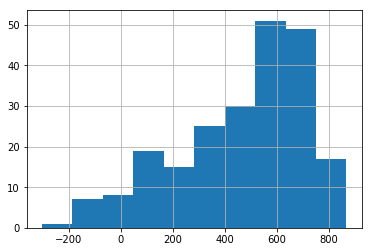

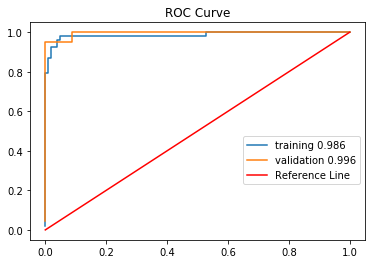

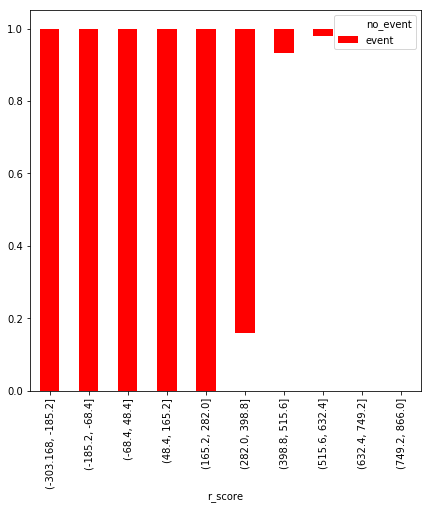

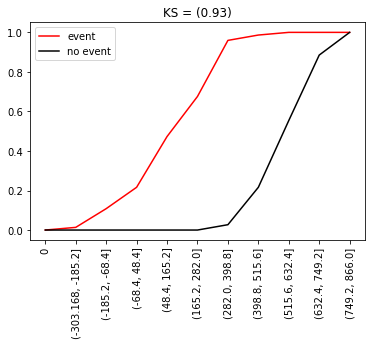

In [139]:
rm.auto_train(default_non_linear_use=False,best_features_threshold=0.1)

In [142]:
print [a for a,b in zip(vard,vard2) if b =='d_47']

[u'\xbfQu\xe9 tanto sabes sobre...? [El nivel de exigencia]']


In [155]:
aux=rm.data[['d_38','target','W_Cop_c_8']].copy()

In [156]:
aux['n']=1

In [158]:
aux.pivot_table(aggfunc='count',columns='target',index='d_38',values='n').to_clipboard()

In [153]:
aux.head()

Cop_c_8  target  W_Cop_c_8  n
0  01. (-|7.96999979019165]       1  -3.988984  1
1  01. (-|7.96999979019165]       1  -3.988984  1
2   02. (7.96999979019|8.5]       1  -1.631417  1
3  01. (-|7.96999979019165]       1  -3.988984  1
4   02. (7.96999979019|8.5]       1  -1.631417  1

In [154]:
rm.ivreport

feature        iv
23   Cop_c_8  3.012883
8    Ceq_c_8  2.042415
58      d_31  1.200000
14  Ceq_c_14  0.654979
29  Cop_c_14  0.642310
74      d_47  0.584973
63      d_36  0.535860
68      d_41  0.452540
57      d_30  0.407273
60      d_33  0.311312
76      d_49  0.311084
62      d_35  0.271788
45      d_18  0.259379
72      d_45  0.232070
34       d_7  0.228323
30       d_0  0.215326
11  Ceq_c_11  0.213375
75      d_48  0.210192
80      d_53  0.191592
46      d_19  0.180508
2    Ceq_c_2  0.172811
20   Cop_c_5  0.167022
77      d_50  0.165367
59      d_32  0.161625
25  Cop_c_10  0.159145
71      d_44  0.149756
37      d_10  0.133113
61      d_34  0.131250
38      d_11  0.129907
4    Ceq_c_4  0.120479
..       ...       ...
56      d_29  0.023453
65      d_38  0.020753
39      d_12  0.020311
43      d_16  0.019982
12  Ceq_c_12  0.019429
35       d_8  0.018907
79      d_52  0.018803
55      d_28  0.017228
19   Cop_c_4  0.015593
31       d_1  0.013397
52      d_25  0.007611
49      d_22  0.007109
48      d_21  0.006754
21   Cop_c_6  0.005807
27  Cop_c_12  0.005716
13  Ceq_c_13  0.005686
36       d_9  0.003562
67      d_40  0.003456
51      d_24  0.000342
50      d_23  0.000331
78      d_51  0.000324
5    Ceq_c_5  0.000191
0    Ceq_c_0  0.000000
54      d_27  0.000000
42      d_15  0.000000
24   Cop_c_9  0.000000
10  Ceq_c_10  0.000000
9    Ceq_c_9  0.000000
7    Ceq_c_7  0.000000
40      d_13  0.000000

[81 rows x 2 columns]